In [1]:
using PyPlot

CONSTANTS - Create a Type

N = # of Points ; L = Domain Size

In [15]:
struct Params
#structure contains # of points N and Domain Spice L
    N::Int
    L::Float64
end

In [3]:
p=Params(101,1.0)

Params(101, 1.0)

In [4]:
struct Params2D
    #contains number of points Nx and Ny and the length of the 
    #2D grid Lx and Ly
    Nx::Int
    Ny::Int
    Lx::Float64
    Ly::Float64
end

Defining the Grid Space

In [5]:
function dX(grid::Params)
    #computing grid space h
    return (grid.L/(grid.N-1))
end

dX (generic function with 1 method)

In [6]:
function dX_2D(grid::Params2D)
    #computes grid space hx
    return (grid.Lx/grid.Nx-1)
end

dX_2D (generic function with 1 method)

In [7]:
function dY_2D(grid::Params2D)
    #computes grid space hy
    return (grid.Ly/grid.Ny-1)
end

dY_2D (generic function with 1 method)

In [8]:
dX(p)

0.01

FUNCTION THAT CONSTRUCTS 1D FUNCTION

In [9]:
function functionOn_1DGrid(u::Function, grid::Params)::Array{Float64,1}
    #1D Function is computed on the grid
    ux=zeros(grid.N)
    h=dX(grid)
    for i in 1:grid.N
        x=(i-1)*h
        ux[i]=u(x)
    end
    return ux
end

functionOn_1DGrid (generic function with 1 method)

USING THE SAME NAME FOR EFFICIENCY - apparently Julia allows this

In [16]:
function functionOnGrid(u::Function, grid::Params)::Array{Float64,1}
    #1D Function is computed on the grid
    ux=zeros(grid.N)
    h=dX(grid)
    for i in 1:grid.N
        x=(i-1)*h
        ux[i]=u(x)
    end
    return ux
end

functionOnGrid (generic function with 2 methods)

In [17]:
function functionOnGrid(u::Function, grid::Params2D)::Array{Float64,2}
    uxy=zeros(grid.Nx,grid.Ny)
    hx=dX_2D(grid)
    hy=dY_2D(grid)
    for i in 1:grid.Nx, j in 1:grid.Ny
        x = (i-1)*hx
        y= (j-1)*hy
        uxy[i,j]=u(x,y)
    end
    return uxy
end 

functionOnGrid (generic function with 2 methods)

In [18]:
x = functionOn_1DGrid(x->x,Params(100,2));
#101 points and identity map gives the coordinates

In [19]:
sinx=functionOn_1DGrid(x->sin(pi*x),Params(100,2));

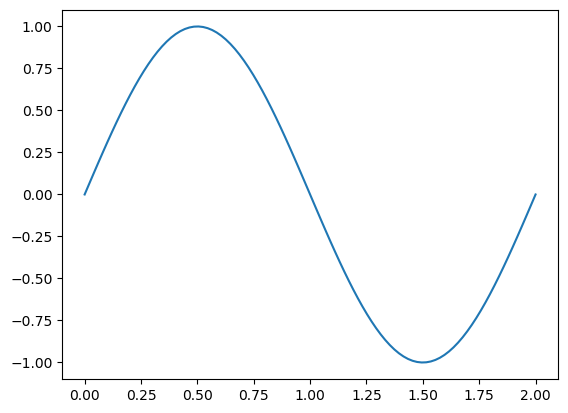

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x148338910>

In [20]:
plot(x,sinx)

In [21]:
function Deriv1D(u::Array{Float64,1},grid::Params)::Array{Float64}
    #Derivative of a function is computed on a 1D grid
    dudx = zeros(grid.N)
    h = dX(grid)
    for i in 1:grid.N
        if i == 1
            dudx[i] = (u[i+1] - u[i])/h
        elseif i == grid.N
            dudx[i] = (u[i]-u[i-1])/h
        else
            dudx[i] = (u[i+1]-u[i-1])/2h
        end
    end
    return dudx
end
    

Deriv1D (generic function with 1 method)

1D Convergence Test

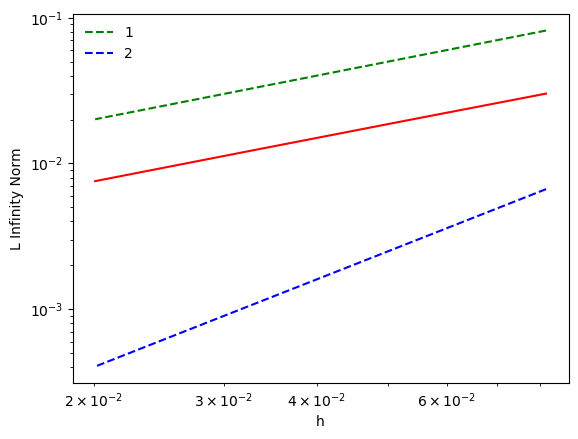

In [22]:
H = []
E = []

for N in 50:200
    grid = Params(N,4)
    u = functionOn_1DGrid(x->sin(x),grid)
    dUdx = functionOn_1DGrid(x->cos(x),grid) #known derivative of sin(x)
    
    #L infinity norm: difference between the numerical derivative and
    #the analytical one, while taking the maximum of it's abs. value
    error = maximum(abs.(Deriv1D(u,grid) - dUdx))
    
    h = dX(grid)
    #append h to the array H and error to the array E
    append!(H,h) 
    append!(E,error)
    
end

loglog(H,E,"r-") #plotting error vs h
loglog(H,H,"g--",label="1") #first order convergence
loglog(H,H.^2,"b--",label="2") #second order convergence
xlabel("h")
ylabel("L Infinity Norm")
legend(loc="best",frameon=false)
show()

In [23]:
function functionOn_2DGrid(u::Function, Nx::Int, Ny::Int)::Array{Float64,2}
    uxy = zeros(Nx,Ny)
    hx = 2/(Nx-1)
    hy = 2/(Ny-1)
    for i in 1:Nx,j in 1:Ny
        x = -1 + (i-1)*hx
        y = -1 + (j-1)*hy
        uxy[i,j] = u(x,y)
    end
    return uxy
end

functionOn_2DGrid (generic function with 1 method)

In [24]:
sinxcosy = functionOn_2DGrid((x,y)->sin(x)*cos(y),100,200);

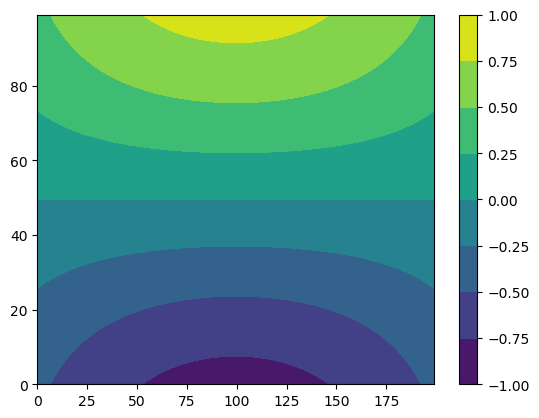

PyObject <matplotlib.colorbar.Colorbar object at 0x148d58dd0>

In [25]:
contourf(sinxcosy)
colorbar()

In [26]:
x2y2= functionOn_2DGrid((x,y)->x^2+y^2,100,100);

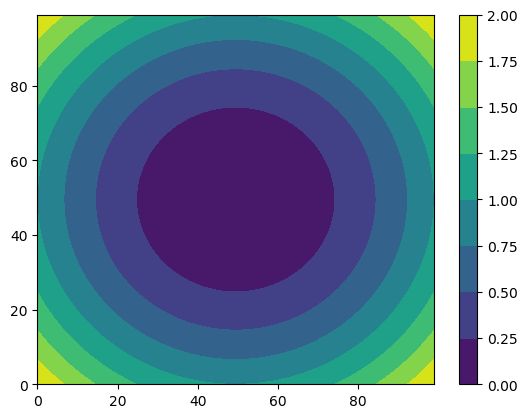

PyObject <matplotlib.colorbar.Colorbar object at 0x148b62790>

In [27]:
contourf(x2y2)
colorbar()

In [28]:
typeof(sinxcosy)

Array{Float64,2}

In [36]:
function DerivX_2D(u::Array{Float64,2}, grid::Params2D)::Array{Float64}
    dudx= zeros(gird.Nx,grid.Ny)
    hx = dX_2D(grid)

    for i in 1:grid.Nx, j in 1:grid.Ny
        if i==1
            dudx[i] = (u[i+1,j] - u[i,j])/hx
        elseif i==grid.Nx
            dudx[i] = (u[i,j] - u[i-1,j])/hx
        else
            dudx[i] = (u[i+1,j]-u[i-1,j])/2hx
        end
    end
    return dudx
end

DerivX_2D (generic function with 1 method)

In [34]:
function DerivY_2D(u::Array{Float64,2},grid::Params2D)::Array{Float64}
    dudy= zeros(grid.Nx,grid.Ny)
    hy = dY_2D(grid)

    for i in 1:grid.Nx, j in 1:grid.Ny
        if j == 1
            dudy[j] = (u[i,j+1] - u[i,j])/hy
        elseif j== grid.Ny
            dudy[j] = (u[i,j]-u[i,j-1])/hy
        else
            dudy[j] = (u[i,j+1]-u[i,j-1])/2hy
        end
    end
    return dudy
end

DerivY_2D (generic function with 1 method)

In [35]:
Hx = []
Ex = []
Hy = []
Ey = []

for Nx in 50:100, Ny in 50:100
    u = functionOn_2DGrid((x,y)->sin(pi*x)*cos(pi*y),Nx,Ny)
    #analytical derivatives
    dUdx = functionOn_2DGrid((x,y)->pi*cos(pi*x)*cos(pi*y),Nx,Ny)
    dUdy = functionOn_2DGrid((x,y)->sin(pi*x)*(-pi)*sin(pi*y),Nx,Ny)
    errorx = maximum(abs.(DerivX_2D(u,Nx,Ny)-dUdx))
    errory = maximum(abs.(DerivY_2D(u,Nx,Ny)-dUdy))
    hx = 2/(Nx-1)
    hy = 2/(Ny-1)
    append!(Hx,hx)
    append!(Ex,errorx)
    append!(Hy,hy)
    append!(Ey,errory)
end

loglog(Hx,Ex,"r-")
#loglog(Hy,Ey,"b-")
loglog(Hx,Hx.^2,"--", label="2")
loglog(Hx,Hx,"--",label="1")
xlabel("hx")
ylabel("L Infinity Norm")
legend(loc="best", frameon=false)
show()

MethodError: MethodError: no method matching DerivX_2D(::Array{Float64,2}, ::Int64, ::Int64)
Closest candidates are:
  DerivX_2D(::Array{Float64,2}, !Matched::Params2D) at In[29]:2